In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline  
import emcee
import math
import matplotlib
hfont = {'fontname':'Times New roman'}
mg2color = [107/256.0, 70/256.0, 177/256.0]

   binning by SN   --- human_acceptance_results.fits
   
for all equivalent widths inserted   ---

   minSN    maxSN  inserted_number discovered_number  RATIO_discovered/inserted
   
      0.00000      1.00000         375      173.000     0.461333
      1.00000      2.00000         373      206.000     0.552278
      2.00000      3.00000         377      297.000     0.787798
      3.00000      4.00000         371      349.000     0.940701
      4.00000      5.00000         371      337.000     0.908356
      5.00000      6.00000         376      355.000     0.944149
      6.00000      8.00000         372      352.000     0.946237
      8.00000      10.0000         375      365.000     0.973333
      10.0000      12.0000         381      369.000     0.968504
      12.0000      14.0000         372      363.000     0.975806
      14.0000      18.0000         377      353.000     0.936339
      18.0000      22.0000         372      352.000     0.938666
      22.0000      30.0000         381      361.000     0.947506
      30.0000      38.0000         374      358.000     0.957219

In [2]:
# pass the values to arrays
min_sn = np.array([0.00000, 1.00000, 2.00000, 3.00000, 
          4.00000, 5.00000, 6.00000, 8.00000, 
          10.0000, 12.0000, 14.0000, 18.0000, 22.0000, 30.0000])

max_sn = np.array([1.00000, 2.00000, 3.00000, 4.00000, 
          5.00000, 6.00000, 8.00000, 10.0000, 
          12.0000, 14.0000, 18.0000, 22.0000, 30.0000, 38.0000])

value = np.array([0.461333, 0.552278, 0.787798, 0.940701, 
                  0.908356, 0.944149, 0.946237, 0.973333, 
                  0.968504, 0.975806, 0.936339, 0.938666, 
                  0.947506, 0.957219])


mid_sn = np.array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 7., 9., 11., 13.0, 16.0, 20.0, 26.0, 34.0])
fit_mid_sn = np.array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 7., 9., 11., 13.0, 16.0, 20.0, 26.0, 34.0, 44])

print(len(fit_mid_sn))

15


In [3]:
n = np.array([375, 373, 377, 371, 371, 
              376, 372, 375, 381, 372, 
              377, 372, 381, 374])

ns = np.array([173.000, 206.000, 297.000, 349.000, 
               337.000, 355.000, 352.000, 365.000, 
               369.000, 363.000, 353.000, 352.000, 
               361.000, 358.000])

nf = n - ns
z = 1.96

error = z*pow(ns*nf/n, 0.5)/100.0
upper_bound = value + error
lower_bound = value - error
upper_bound[np.where(upper_bound > 1.0)] = 1.0

In [4]:
print(error)

[ 0.18920786  0.18823202  0.15559965  0.08916474  0.10892399  0.08727422
  0.08526503  0.06114865  0.0668186   0.05808435  0.0929134   0.08526503
  0.08532223  0.07670466]


In [5]:
# leave a cell for the fitting process
# exponential function where
# fit_function = p*(1.0 - np.exp(sn/sc))
# p = scalar (0 to 1 in 0.001 steps)
# sn = is the signal to noise (the x axis)
# s = is an exponential scale factor (also to be fit for, (0 to 5, in 0.01 steps), from looking at the distribution)

chi2 =  np.zeros(2000.0*1000.0)
inv_sigma2 =  np.zeros(2000.0*1000.0)
lnlike =  np.zeros(2000.0*1000.0)
ps = np.zeros(2000.0*1000.0)
ss = np.zeros(2000.0*1000.0)


/Users/alex/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/alex/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/alex/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/alex/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/alex/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [6]:
local_counter = 0
yerr = error
y = value

for p in range(0, 1999): 
    local_p = p/1000.0
    for s in range(0, 999):
        local_sc = s/100.0
        model = local_p*(1.0 - np.exp(-mid_sn/local_sc))
        chi2[local_counter] =np.sum((model - y)*(model - y))#/yerr/yerr)
        ps[local_counter] = local_p
        ss[local_counter] = local_sc
        
        inv_sigma2 = 1.0/(yerr**2 + model**2)   
        sigma2 = (yerr**2 + model**2)
        lnlike[local_counter] = -0.5*(np.sum((y-model)**2*inv_sigma2 - np.log(6.28*sigma2)))
        
        local_counter = local_counter + 1
        #print(p, sc)
        #plt.plot(mid_sn, local_function, 'b-', lw=0.5, alpha = 0.1)
        




25.013081297
0.87 0.954 1.042
0.63 1.28 2.12


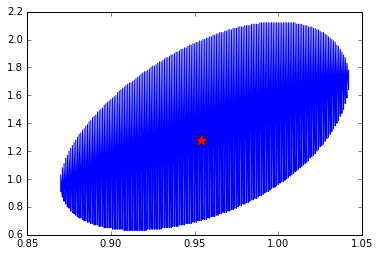

In [7]:
chi2scale = 1./min(chi2[np.where(chi2 > 0)])
chi2_adjusted = chi2[np.where(chi2 > 0)]*chi2scale
best_ps = ps[np.where((chi2_adjusted < 2.706))]
best_ss = ss[np.where((chi2_adjusted < 2.706))]

pbs = ps[np.where((chi2_adjusted == min(chi2_adjusted)))]
sss = ss[np.where((chi2_adjusted == min(chi2_adjusted)))]

print(chi2scale)
print(min(best_ps), pbs[0], max(best_ps))
print(min(best_ss), sss[0], max(best_ss))

plt.plot(best_ps, best_ss)
plt.plot(pbs, sss, 'r*',markersize=15 )

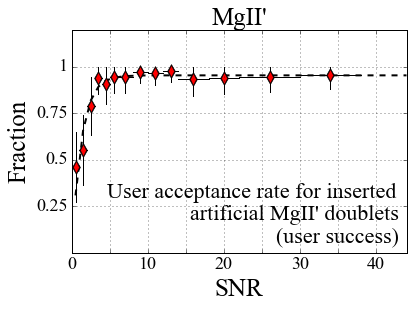

In [8]:
# plot the data

# x, y labels and title
plt.ylabel('Fraction', **hfont,  fontsize=25)
plt.xlabel('SNR', **hfont,  fontsize=25)
plt.title("MgII'", **hfont,  fontsize=25)

# x and y ranges and scale
plt.xlim([0, 44])
plt.ylim([0,1.2])


# plot the fit
# p boundary = 0.92 0.96 1.002
# s boundary = 0.63 1.25 1.91

# 0.87 0.954 1.042
# 0.63 1.28 2.12
flow = 0.87*(1.0 - np.exp(-fit_mid_sn/2.12))
fhigh = 1.0*(1.0 - np.exp(-fit_mid_sn/0.63))
f  = 0.954*(1.0 - np.exp(-fit_mid_sn/1.28))

# plot the shaded fit 
plt.plot(fit_mid_sn, f, 'k--', lw = 2, alpha = 1)
#plt.fill_between(fit_mid_sn, flow, fhigh, color = 'r', alpha = 0.2)

# x and y ticks
xlabels = ['0', ' ', '10', ' ', '20', ' ', '30', ' ', '40']
plt.xticks([0, 5, 10, 15, 20, 25, 30, 35, 40], 
            xlabels, **hfont, fontsize = 18)
ylabels = [' ', '0.25', '0.5', '0.75', '1']
plt.yticks([0, 0.25, 0.5, 0.75, 1.0], 
            ylabels, **hfont, fontsize = 18)

plt.grid(True)


# plot the vertical error bounds    
for i in range(0, len(min_sn)):
    plt.plot([mid_sn[i], mid_sn[i]], [upper_bound[i], lower_bound[i]], 'k-', lw=1.0)

# plot the bin boundaries
for i in range(0, len(min_sn)):
    plt.plot([min_sn[i], max_sn[i]], [value[i], value[i]], 'k-', lw=1.0)

    
# plot the results
plt.plot(mid_sn, value, 'kd', markersize=10, alpha=1.0)  
plt.plot(mid_sn, value, 'rd', markersize=8, alpha=1.0)   

# output a label
txt = plt.text(4.6, 0.3, "User acceptance rate for inserted", **hfont,  fontsize=22)
txt = plt.text(15.5, 0.18, "artificial MgII' doublets", **hfont,  fontsize=22)
txt = plt.text(26.8, 0.06, "(user success) ", **hfont,  fontsize=22)


plt.savefig('mg2_acceptance_artificial.png', bbox_inches='tight', figsize=[24,12], dpi=500)

